In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [2]:
df = pd.read_csv('train.csv')
df.head()

X=df['Message']
Y=df['Type']

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

X_test1=df_test['Message']
Y_test1=df_test['Type']

In [4]:
df.describe()

,Type,Message
count,4142,4142
unique,2,3906
top,Friendly,"Ksnnk, S'xx myxx xyban"
freq,3585,26


In [5]:
spam_messages = df[df["Type"]=="Hostile"]
spam_messages.head()

,Type,Message
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs..."
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ..."


In [6]:
spam_messages.describe()

,Type,Message
count,557,557
unique,1,501
top,Hostile,Pxayua myxx sin miubsean uanpcma naznaualbybcp...
freq,557,3


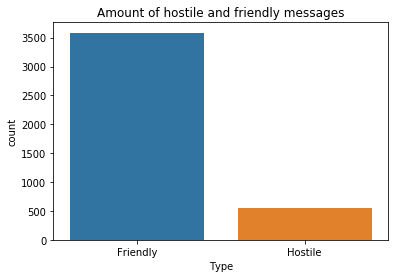

In [10]:
sns.countplot(data = df, x= df["Type"]).set_title("Amount of hostile and friendly messages")
plt.show()

**Splitting the SMS data into Test and Train data**

In [164]:
data_train, data_test, labels_train, labels_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3313,) (3313,)
data_test, labels_test:  (829,) (829,)


In [165]:
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(analyzer = 'char', max_df=0.2,ngram_range=(1,8))
tfidf = tfidf_vectorizer.fit(data_train)
data_train_count  = tfidf.transform(data_train)
data_test_count  = tfidf.transform(data_test)
data_test_count2 = tfidf.transform(X_test1)

In [166]:
data_test_count.shape, data_test_count2.shape

((829, 550550), (1380, 550550))

In [167]:
for i in range(1):
    clf = MultinomialNB(alpha=.0044)
    clf.fit(data_train_count, labels_train)
    predictions = clf.predict(data_test_count)
    print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9891435464414958


In [168]:
predictions_prob=clf.predict_proba(data_test_count)

In [169]:
predictions_prob

array([[9.99999773e-01, 2.26601027e-07],
       [9.99998959e-01, 1.04065571e-06],
       [1.00000000e+00, 1.79579747e-12],
       ...,
       [9.99999939e-01, 6.06239672e-08],
       [2.17438577e-18, 1.00000000e+00],
       [1.00000000e+00, 2.52381982e-12]])

In [170]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions))

accuracy_score :  0.9891435464414958


In [171]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions))

confusion_matrix : 
 [[707   2]
 [  7 113]]


In [172]:
print (classification_report(labels_test, predictions))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      0.99       709
     Hostile       0.98      0.94      0.96       120

    accuracy                           0.99       829
   macro avg       0.99      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829



In [173]:
predictions_test = clf.predict(data_test_count2)

In [174]:
df_predictions_test=pd.DataFrame(predictions_test)
df_predictions_test.to_csv('predictions_test2_cv.csv')

In [191]:
predictions_prob=clf.predict_proba(data_test_count2)

df_predictions_test_p=pd.DataFrame(predictions_prob)
df_predictions_test_p.to_csv('predictions_test_p_1.csv')

In [192]:
df_predictions_test_p=pd.DataFrame(predictions_prob[:,1])

In [193]:
df_predictions_test_p.head()

,0
0,1.000000e+00
1,1.211739e-17
2,1.000000e+00
3,2.212476e-10
4,2.661485e-17


In [194]:
df_predictions_test_p1 = df_predictions_test_p.copy()

In [195]:
(a,b) = (df_predictions_test_p1.iloc[600].copy(),df_predictions_test_p1.iloc[1066].copy())

In [196]:
(df_predictions_test_p.iloc[1066],df_predictions_test_p.iloc[600]) = (a,b)

In [197]:
predictions_prob = predictions_prob[:,1]

In [198]:
pred = (df_predictions_test_p>0.1).astype(int)

In [200]:
pred.to_csv('predictions_test_p_2.csv')